In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nb
import pickle
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
df = pd.read_csv('/home/julia/data/gradients/results/regions/finest_regions.csv')
df = df.drop(columns=['Unnamed: 0', 'comment'])
df = df.dropna()
df = df.reindex()

## Connectivity gradients

In [4]:
df.loc[df['acronym']=='MOp', 'cluster'] = 'motor'
df.loc[df['acronym']=='MOs', 'cluster'] = 'motor'
df.loc[df['cluster']=='somatomotor', 'cluster'] = 'somatosensory'

In [5]:
clusters = ['motor', 'somatosensory', 'prefrontal','lateral', 'medial', 'visual', 'auditory']
colors = ['#bd4400ff', 'tab:orange', 'tab:red', 'gold', 'darkblue','cornflowerblue','slateblue']

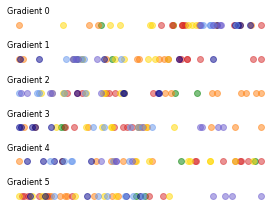

In [6]:
fig = plt.figure(figsize=(4,3))
for g in range(6):
    fig.add_subplot(6,1,g+1)
    for c in range(len(clusters)): 
        plt.plot(df.loc[df['cluster']=='%s'%clusters[c], 'gradient %i'%g],
                 np.ones(len(df.loc[df['cluster']=='%s'%clusters[c], 'gradient %i'%g])),
                 'o', color=colors[c], label='%s'%clusters[c], alpha=0.5)
    plt.title('Gradient %i'%g, fontsize=8, loc='left')
    plt.axis('off')
plt.tight_layout()

In [7]:
with open('/home/julia/data/gradients/results/regions/gradient2_by_cluster.pkl', 'rb') as f:
    g2 = pickle.load(f)
with open('/home/julia/data/gradients/results/regions/gradient4_by_cluster.pkl', 'rb') as f:
    g4 = pickle.load(f)
with open('/home/julia/data/gradients/results/regions/gradient1_by_cluster.pkl', 'rb') as f:
    g1 = pickle.load(f)
with open('/home/julia/data/gradients/results/regions/gradient3_by_cluster.pkl', 'rb') as f:
    g3 = pickle.load(f)
with open('/home/julia/data/gradients/results/regions/gradient0_by_cluster.pkl', 'rb') as f:
    g0 = pickle.load(f)
with open('/home/julia/data/gradients/results/regions/gradient5_by_cluster.pkl', 'rb') as f:
    g5 = pickle.load(f)

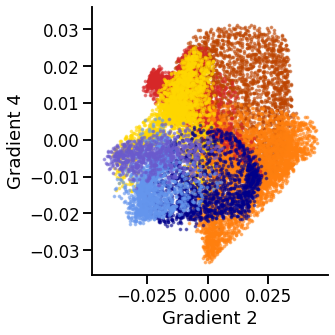

In [48]:
clusters = ['motor', 'somatosensory', 'prefrontal','lateral', 'medial', 'visual', 'auditory']
colors = ['#bd4400ff', 'tab:orange', 'tab:red', 'gold', 'darkblue','cornflowerblue','slateblue']
sns.set_context('talk')
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], g4[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
plt.xlabel('Gradient 2')
plt.ylabel('Gradient 4')
plt.tight_layout()
sns.despine()

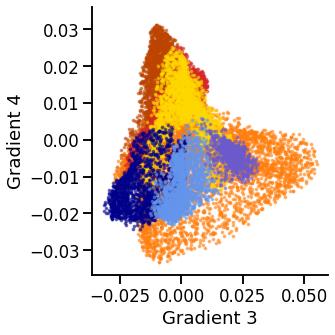

In [32]:
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g3[r], g4[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
plt.xlabel('Gradient 3')
plt.ylabel('Gradient 4')
plt.tight_layout()
sns.despine()

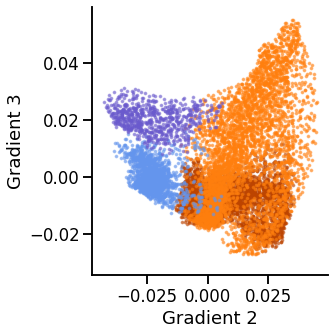

In [36]:
clusters = ['motor', 'somatosensory', 'visual', 'auditory']
colors = ['#bd4400ff', 'tab:orange', 'cornflowerblue','slateblue']
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], g3[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
plt.xlabel('Gradient 2')
plt.ylabel('Gradient 3')
plt.tight_layout()
sns.despine()

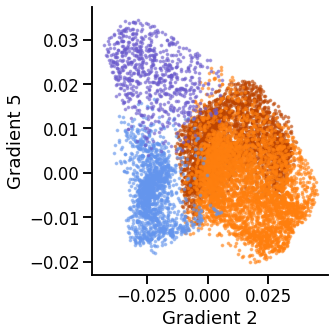

In [39]:
clusters = ['motor', 'somatosensory', 'visual', 'auditory']
colors = ['#bd4400ff', 'tab:orange', 'cornflowerblue','slateblue']
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], g5[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
plt.xlabel('Gradient 2')
plt.ylabel('Gradient 5')
plt.tight_layout()
sns.despine()

<IPython.core.display.Javascript object>


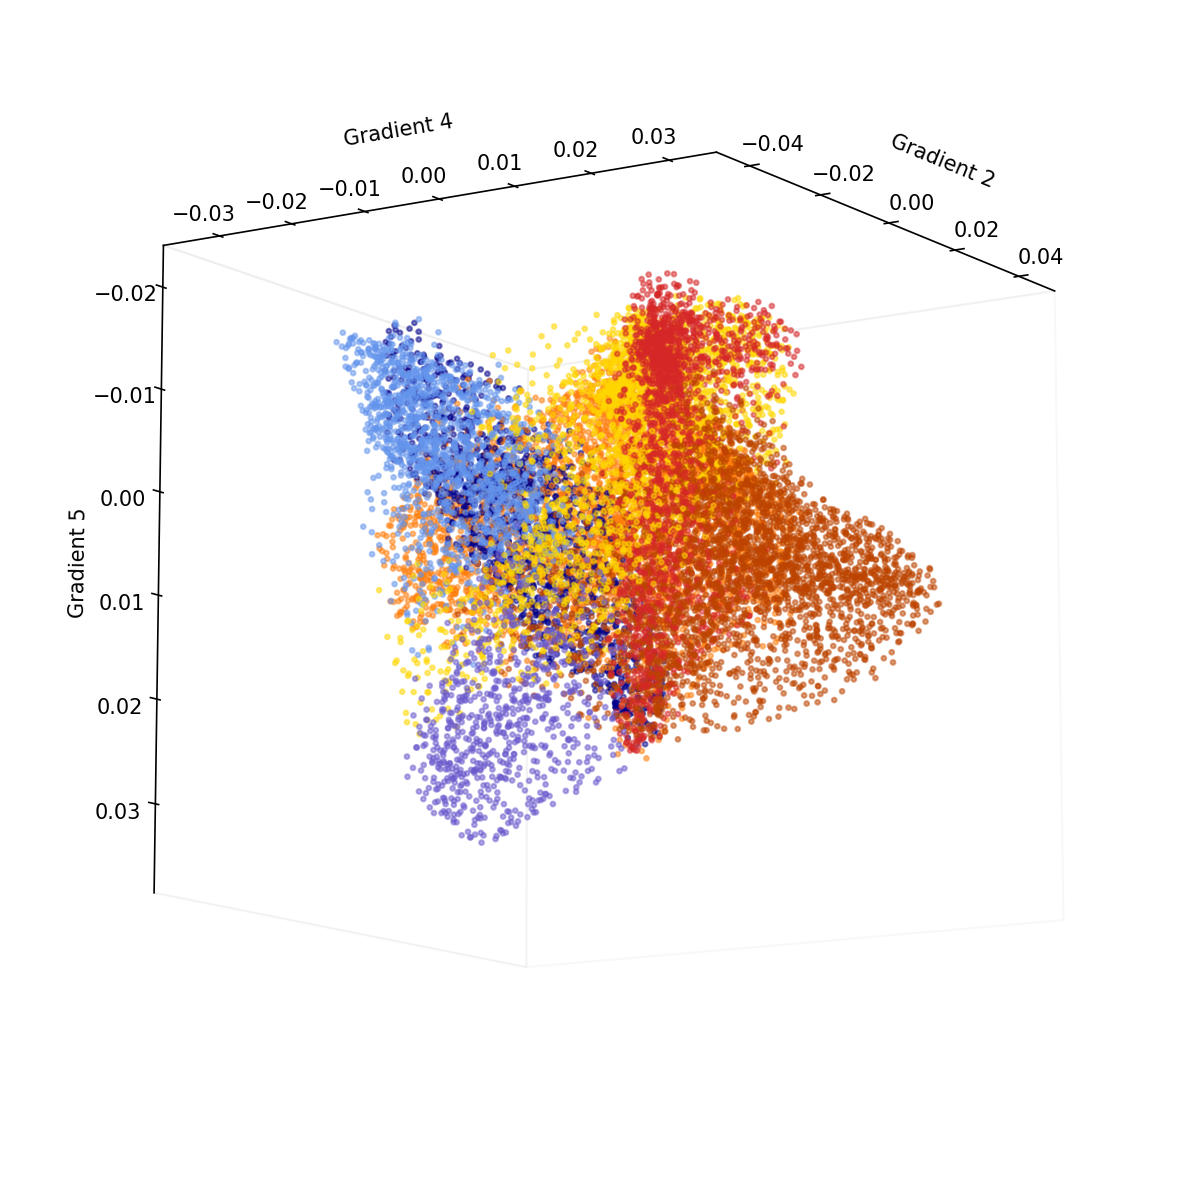

In [8]:
clusters = ['motor', 'somatosensory', 'prefrontal','lateral', 'medial', 'visual', 'auditory']
colors = ['#bd4400ff', 'tab:orange', 'tab:red', 'gold', 'darkblue','cornflowerblue','slateblue']
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        ax.scatter(xs=g2[r], ys=g4[r], zs=g5[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
#ax.set_xlim(-0.025, 0.045)
#ax.set_ylim(-0.025, 0.045)
#ax.set_zlim(-0.035, 0.035)

ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False

ax.set_xlabel('Gradient 2')
ax.set_ylabel('Gradient 4')
ax.set_zlabel('Gradient 5')
plt.tight_layout()

### Gene components

In [13]:
pca = nb.load('/home/julia/data/gradients/results/genes/pca_img.nii.gz').get_data()
gene_mask = nb.load('/home/julia/data/gradients/genes/gene_mask.nii.gz').get_data()
annot = np.array(nb.load('/home/julia/data/gradients/atlas/allen_api/regions/annot_finest_200um.nii.gz').get_data(), dtype='float64')

for p in range(6):
    p_masked = pca[:,:,:,p]
    p_masked[gene_mask==0] = np.nan
    p_dict = {}
    for region in df['id']:
        acronym = df.loc[df['id']==region, 'acronym'].values[0]
        p_dict[acronym] = p_masked[annot==region]
        
    with open('/home/julia/data/gradients/results/genes/pca%i_by_cluster.pkl' % p, 'wb') as f:
        pickle.dump(p_dict, f)

In [14]:
with open('/home/julia/data/gradients/results/genes/pca2_by_cluster.pkl', 'rb') as f:
    p2 = pickle.load(f)
with open('/home/julia/data/gradients/results/genes/pca4_by_cluster.pkl', 'rb') as f:
    p4 = pickle.load(f)
with open('/home/julia/data/gradients/results/genes/pca1_by_cluster.pkl', 'rb') as f:
    p1 = pickle.load(f)
with open('/home/julia/data/gradients/results/genes/pca3_by_cluster.pkl', 'rb') as f:
    p3 = pickle.load(f)
with open('/home/julia/data/gradients/results/genes/pca0_by_cluster.pkl', 'rb') as f:
    p0 = pickle.load(f)
with open('/home/julia/data/gradients/results/genes/pca5_by_cluster.pkl', 'rb') as f:
    p5 = pickle.load(f)

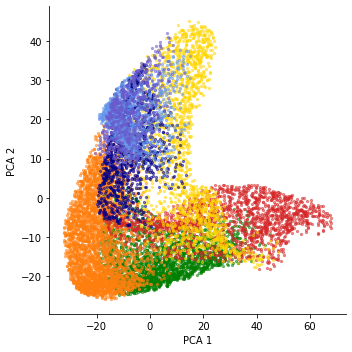

In [23]:
clusters = ['motor', 'somatosensory','prefrontal','lateral', 'medial', 'visual', 'auditory']
colors = ['green', 'tab:orange', 'tab:red', 'gold', 'darkblue','cornflowerblue','slateblue']
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(p1[r], p2[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
sns.despine()

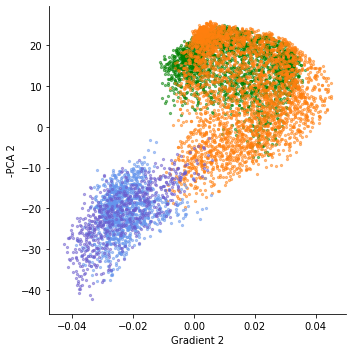

In [38]:
clusters = ['motor', 'somatosensory','visual', 'auditory']
colors = ['green', 'tab:orange', 'cornflowerblue','slateblue']
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], -p2[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
plt.xlabel('Gradient 2')
plt.ylabel('-PCA 2')
plt.tight_layout()
sns.despine()

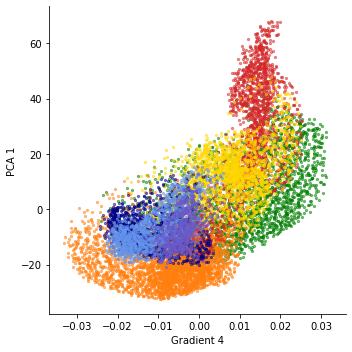

In [40]:
clusters = ['motor', 'somatosensory','prefrontal','lateral', 'medial', 'visual', 'auditory']
colors = ['green', 'tab:orange', 'tab:red', 'gold', 'darkblue','cornflowerblue','slateblue']
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g4[r], p1[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
plt.xlabel('Gradient 4')
plt.ylabel('PCA 1')
plt.tight_layout()
sns.despine()